# Univariate Linear Transformations

Adding squared or cubed feature can help linear models for regression. There are other transformations that could be used to transform certain features like $\log$ _exp_ or _sin_. Linear models and neural networks are very tied to distributions and if there is a non linear relation between the featues and the target that becomer harder to model particurally regression. 

In [5]:
# create dummy data that is asymetric
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(0)
X = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X_log = rnd.poisson(10 * np.exp(X))
y = np.dot(X, w)

print(X_log)

[[56 18 27]
 [81 57  3]
 [25  9 11]
 ...
 [ 2 16 16]
 [ 7 76  4]
 [ 7  3  8]]


Text(0, 0.5, 'Number of appereances')

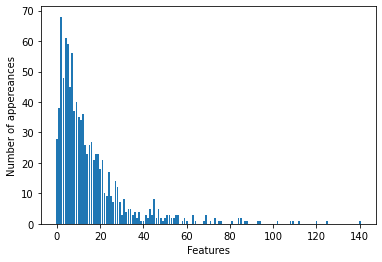

In [10]:
# visualize the data
bins = np.bincount(X_log[:,0])
plt.bar(range(len(bins)), bins)
plt.xlabel("Features")
plt.ylabel("Number of appereances")

In [14]:
# try to fit the untransformed data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_log, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Score {}".format(score))

Score 0.6224186236310756


Text(0, 0.5, 'Number of appereances')

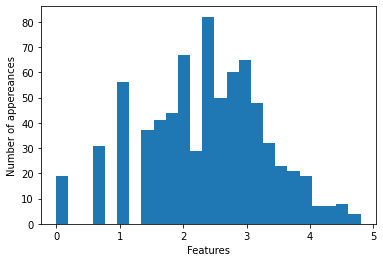

In [20]:
# fitting the transformed data using log
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

# visualize the transformed data
plt.hist(X_train_log[:, 0], bins=25)
plt.xlabel("Features")
plt.ylabel("Number of appereances")

# the result is data is less asymetrical

In [21]:
# build a model using transformed data
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Transformed score ", score)

Transformed score  0.8749342372887816
